In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#load the dataset HAM10000_metadata
data = pd.read_csv('HAM10000_metadata.csv')
print("First few rows of the dataset:")
print(data.head())

First few rows of the dataset:
     lesion_id      image_id   dx dx_type   age   sex localization
0  HAM_0000118  ISIC_0027419  bkl   histo  80.0  male        scalp
1  HAM_0000118  ISIC_0025030  bkl   histo  80.0  male        scalp
2  HAM_0002730  ISIC_0026769  bkl   histo  80.0  male        scalp
3  HAM_0002730  ISIC_0025661  bkl   histo  80.0  male        scalp
4  HAM_0001466  ISIC_0031633  bkl   histo  75.0  male          ear


In [4]:
print(data.shape)

(10015, 7)


In [5]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10015 entries, 0 to 10014
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   lesion_id     10015 non-null  object 
 1   image_id      10015 non-null  object 
 2   dx            10015 non-null  object 
 3   dx_type       10015 non-null  object 
 4   age           9958 non-null   float64
 5   sex           10015 non-null  object 
 6   localization  10015 non-null  object 
dtypes: float64(1), object(6)
memory usage: 547.8+ KB
None


In [6]:
print(data.describe())

               age
count  9958.000000
mean     51.863828
std      16.968614
min       0.000000
25%      40.000000
50%      50.000000
75%      65.000000
max      85.000000


In [21]:
print(data['age'].isnull().sum())

57


In [7]:
print(data.isnull().sum())

lesion_id        0
image_id         0
dx               0
dx_type          0
age             57
sex              0
localization     0
dtype: int64


In [8]:
print(data.columns)

Index(['lesion_id', 'image_id', 'dx', 'dx_type', 'age', 'sex', 'localization'], dtype='object')


In [9]:
print(data.head())

     lesion_id      image_id   dx dx_type   age   sex localization
0  HAM_0000118  ISIC_0027419  bkl   histo  80.0  male        scalp
1  HAM_0000118  ISIC_0025030  bkl   histo  80.0  male        scalp
2  HAM_0002730  ISIC_0026769  bkl   histo  80.0  male        scalp
3  HAM_0002730  ISIC_0025661  bkl   histo  80.0  male        scalp
4  HAM_0001466  ISIC_0031633  bkl   histo  75.0  male          ear


In [10]:
gender_counts =data['sex'].value_counts()
print(gender_counts)

sex
male       5406
female     4552
unknown      57
Name: count, dtype: int64


In [11]:
location_count = data['localization'].value_counts()
print(location_count)

localization
back               2192
lower extremity    2077
trunk              1404
upper extremity    1118
abdomen            1022
face                745
chest               407
foot                319
unknown             234
neck                168
scalp               128
hand                 90
ear                  56
genital              48
acral                 7
Name: count, dtype: int64


In [12]:
location_by_gender = data.groupby('sex')['localization'].value_counts()
print(location_by_gender)

sex      localization   
female   lower extremity    1152
         back                843
         trunk               638
         upper extremity     496
         abdomen             433
         face                348
         foot                173
         chest               142
         unknown              95
         neck                 73
         hand                 57
         genital              34
         scalp                31
         ear                  30
         acral                 7
male     back               1347
         lower extremity     925
         trunk               763
         upper extremity     622
         abdomen             587
         face                397
         chest               265
         foot                143
         scalp                97
         neck                 95
         unknown              92
         hand                 33
         ear                  26
         genital              14
unknown  unknown  

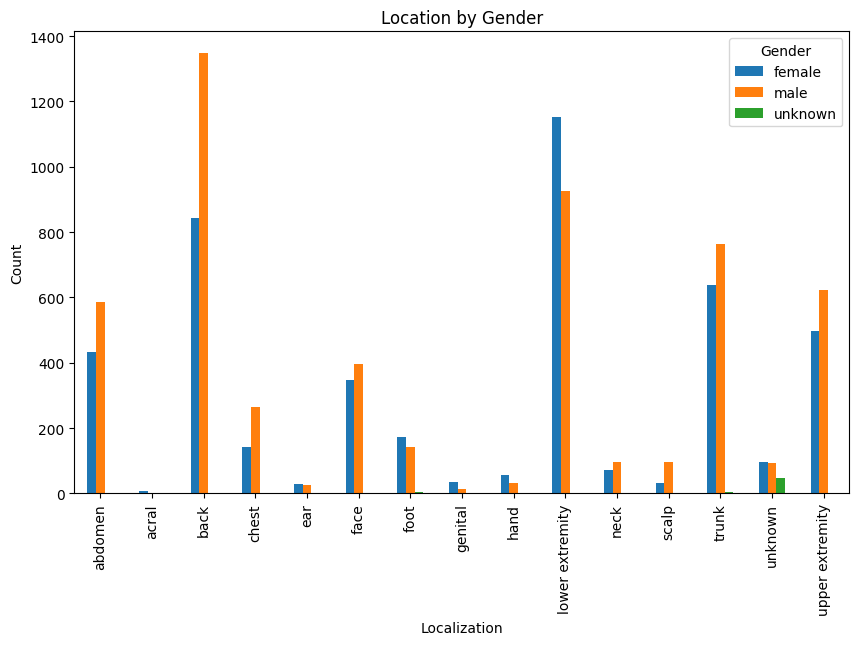

In [13]:
#Create the plot for the location by gender 
location_by_gender = data.groupby('sex')['localization'].value_counts()
location_by_gender_unstacked = location_by_gender.unstack('sex')
#plot the data 
location_by_gender_unstacked.plot(kind='bar',figsize=(10,6))
plt.title('Location by Gender')
plt.xlabel('Localization')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.show()

C:\Users\Shravani Desai\AppData\Local\Temp\ipykernel_18024\3097229810.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Diagnosis',y='Count',data=diagnosis_counts,palette='viridis')


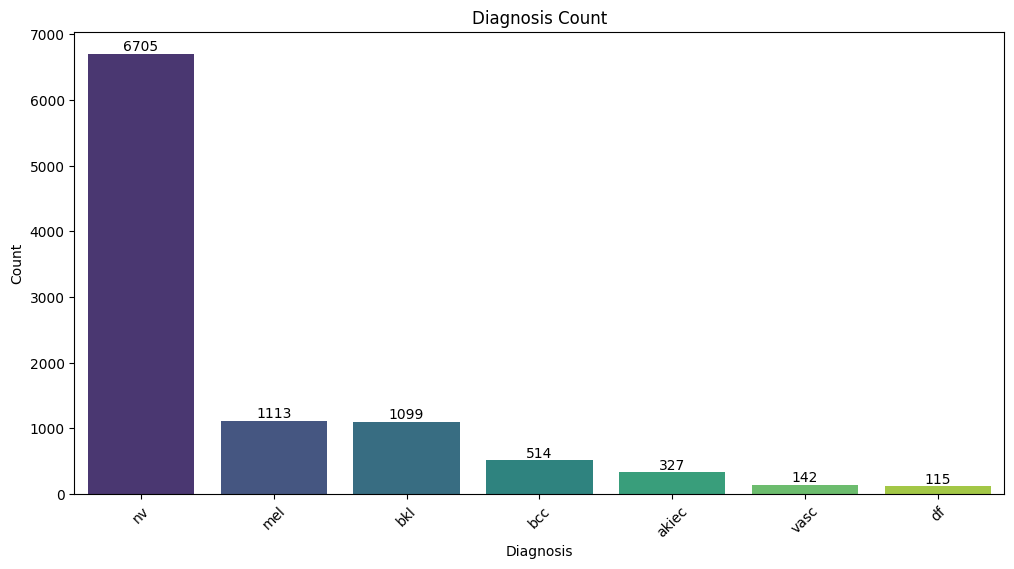

In [14]:
#calculate the counts for each diagnosis
diagnosis_counts =data['dx'].value_counts().reset_index()
diagnosis_counts.columns = ['Diagnosis','Count']
#create a count plot
plt.figure(figsize=(12,6))
sns.barplot(x='Diagnosis',y='Count',data=diagnosis_counts,palette='viridis')
#plot the title and labels
plt.title('Diagnosis Count')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
for index,row in diagnosis_counts.iterrows():
    plt.text(row.name,row.Count,f"{row.Count:.0f}",
             ha='center',va='bottom',fontsize=10)
plt.xticks(rotation=45)
plt.show()

    

In [16]:
def check_duplicate():
    duplicate_rows = data[data.duplicated()]
    if len(duplicate_rows)>0:
        print("There are duplicates in the datasets.")
        print(duplicate_rows)
    else:
        print("There are no duplicates in the datasets.")
check_duplicate()

There are no duplicates in the datasets.
